### 1. generate results trough mAP repository for each case

In [37]:
folder = 'inferences'

DETECTOR = 'retinanet'
LABEL = 'inria_person'

path = "%s/%s-%s.txt" % (folder, LABEL, DETECTOR)

predicted_folder = '/home/lrs14/mAP/predicted/'
with open(path) as f:
  rows = [line[:-1] for line in f]
  f = None
  for row in rows:
    if 'png' in row:
      path = predicted_folder + row.replace('png', 'txt')
      if f is not None:
        f.close()
      f = open(path, 'w')
    else:
        values = row.split(' ')
        xmin = int(float(values[0]))
        ymin = int(float(values[1]))
        xmax = int(float(values[2]))
        ymax = int(float(values[3]))
        result = "%s %s %d %d %d %d\n" % (LABEL, values[4], xmin, ymin, xmax, ymax)
        f.write(result)
if f is not None:
  f.close()

#### run main.py at mAP folder
```
mv results LABEL-DETECTOR-results
```

### 2. combine results to the same plot

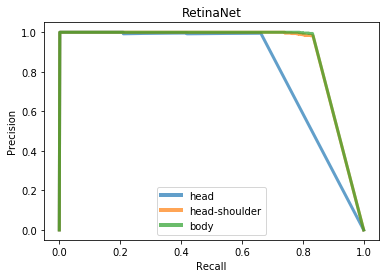

In [34]:
import matplotlib.pyplot as plt
import json

labels = ['head', 'shoulder', 'inria_person']
DETECTOR = 'RetinaNet'

# workaround
legend_labels = {
  'head': 'head',
  'shoulder': 'head-shoulder',
  'inria_person': 'body'
}

for LABEL in labels:  
  json_data = open('/home/lrs14/mAP/' + LABEL + '-rec-prec.json').read()
  data = json.loads(json_data)

  rec = data['rec']
  prec = data['prec']
    
  plt.plot(rec, prec, alpha=0.7, label=legend_labels[LABEL], linewidth=3.0)
  
plt.title(DETECTOR)
plt.xlabel('Recall')
plt.ylabel('Precision')

leg = plt.legend()

for line in leg.get_lines():
    line.set_linewidth(4)
    
plt.show()